## Plot performance of models against underlying price

In [18]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
from sklearn.linear_model import LogisticRegression

sys.path += ['../']
from functions import plot_performace

plt.rcParams["figure.figsize"] = (10, 5)
plt.rcParams['figure.dpi'] = 500

### BTC Movement

In [19]:
coin = 'btc'

In [20]:
data = pd.read_parquet(f'../../4_eda/{coin}_stationary_data_lagged.parquet.gzip')
data.columns = data.columns.map('_'.join)
data = (data.fillna(method='ffill')
            .fillna(0)
            .replace([np.inf, -np.inf], 0))
targets = pd.read_parquet(f'../../2_data_processing/numeric_data/{coin}_targets.parquet.gzip')
price_data = pd.read_parquet(f'../../2_data_processing/numeric_data/{coin}_price_data.parquet.gzip').iloc[:,0]

In [21]:
%%capture
with open(f'../../4_eda/{coin}_causality/{coin}_price_log_difference_causality.txt') as f:
    price_log_difference_vars = f.read().splitlines()
X = data[price_log_difference_vars]

X_train = X
X_test = X.tail(800).head(300)
targets_train = targets
targets_test = targets.tail(800).head(300)
price_data_test = price_data.tail(800).head(300)

y_train = (targets_train[f'{coin}_price_log_difference'] > 0) * 1
y_test = (targets_test[f'{coin}_price_log_difference'] > 0) * 1

model_config = {
    # 'class_weight': {0: 1, 1: 1.1502551910751493},
    'C': 1000,
    'solver': 'saga',
    'max_iter': 1000,
    'random_state': 42,
}
model = LogisticRegression(**model_config).fit(X_train, y_train)

y_pred = model.predict_proba(X_test)[:,1]
y_pred = (y_pred >= 0.5) * 1
y_pred = pd.Series(y_pred, index=X_test.index)

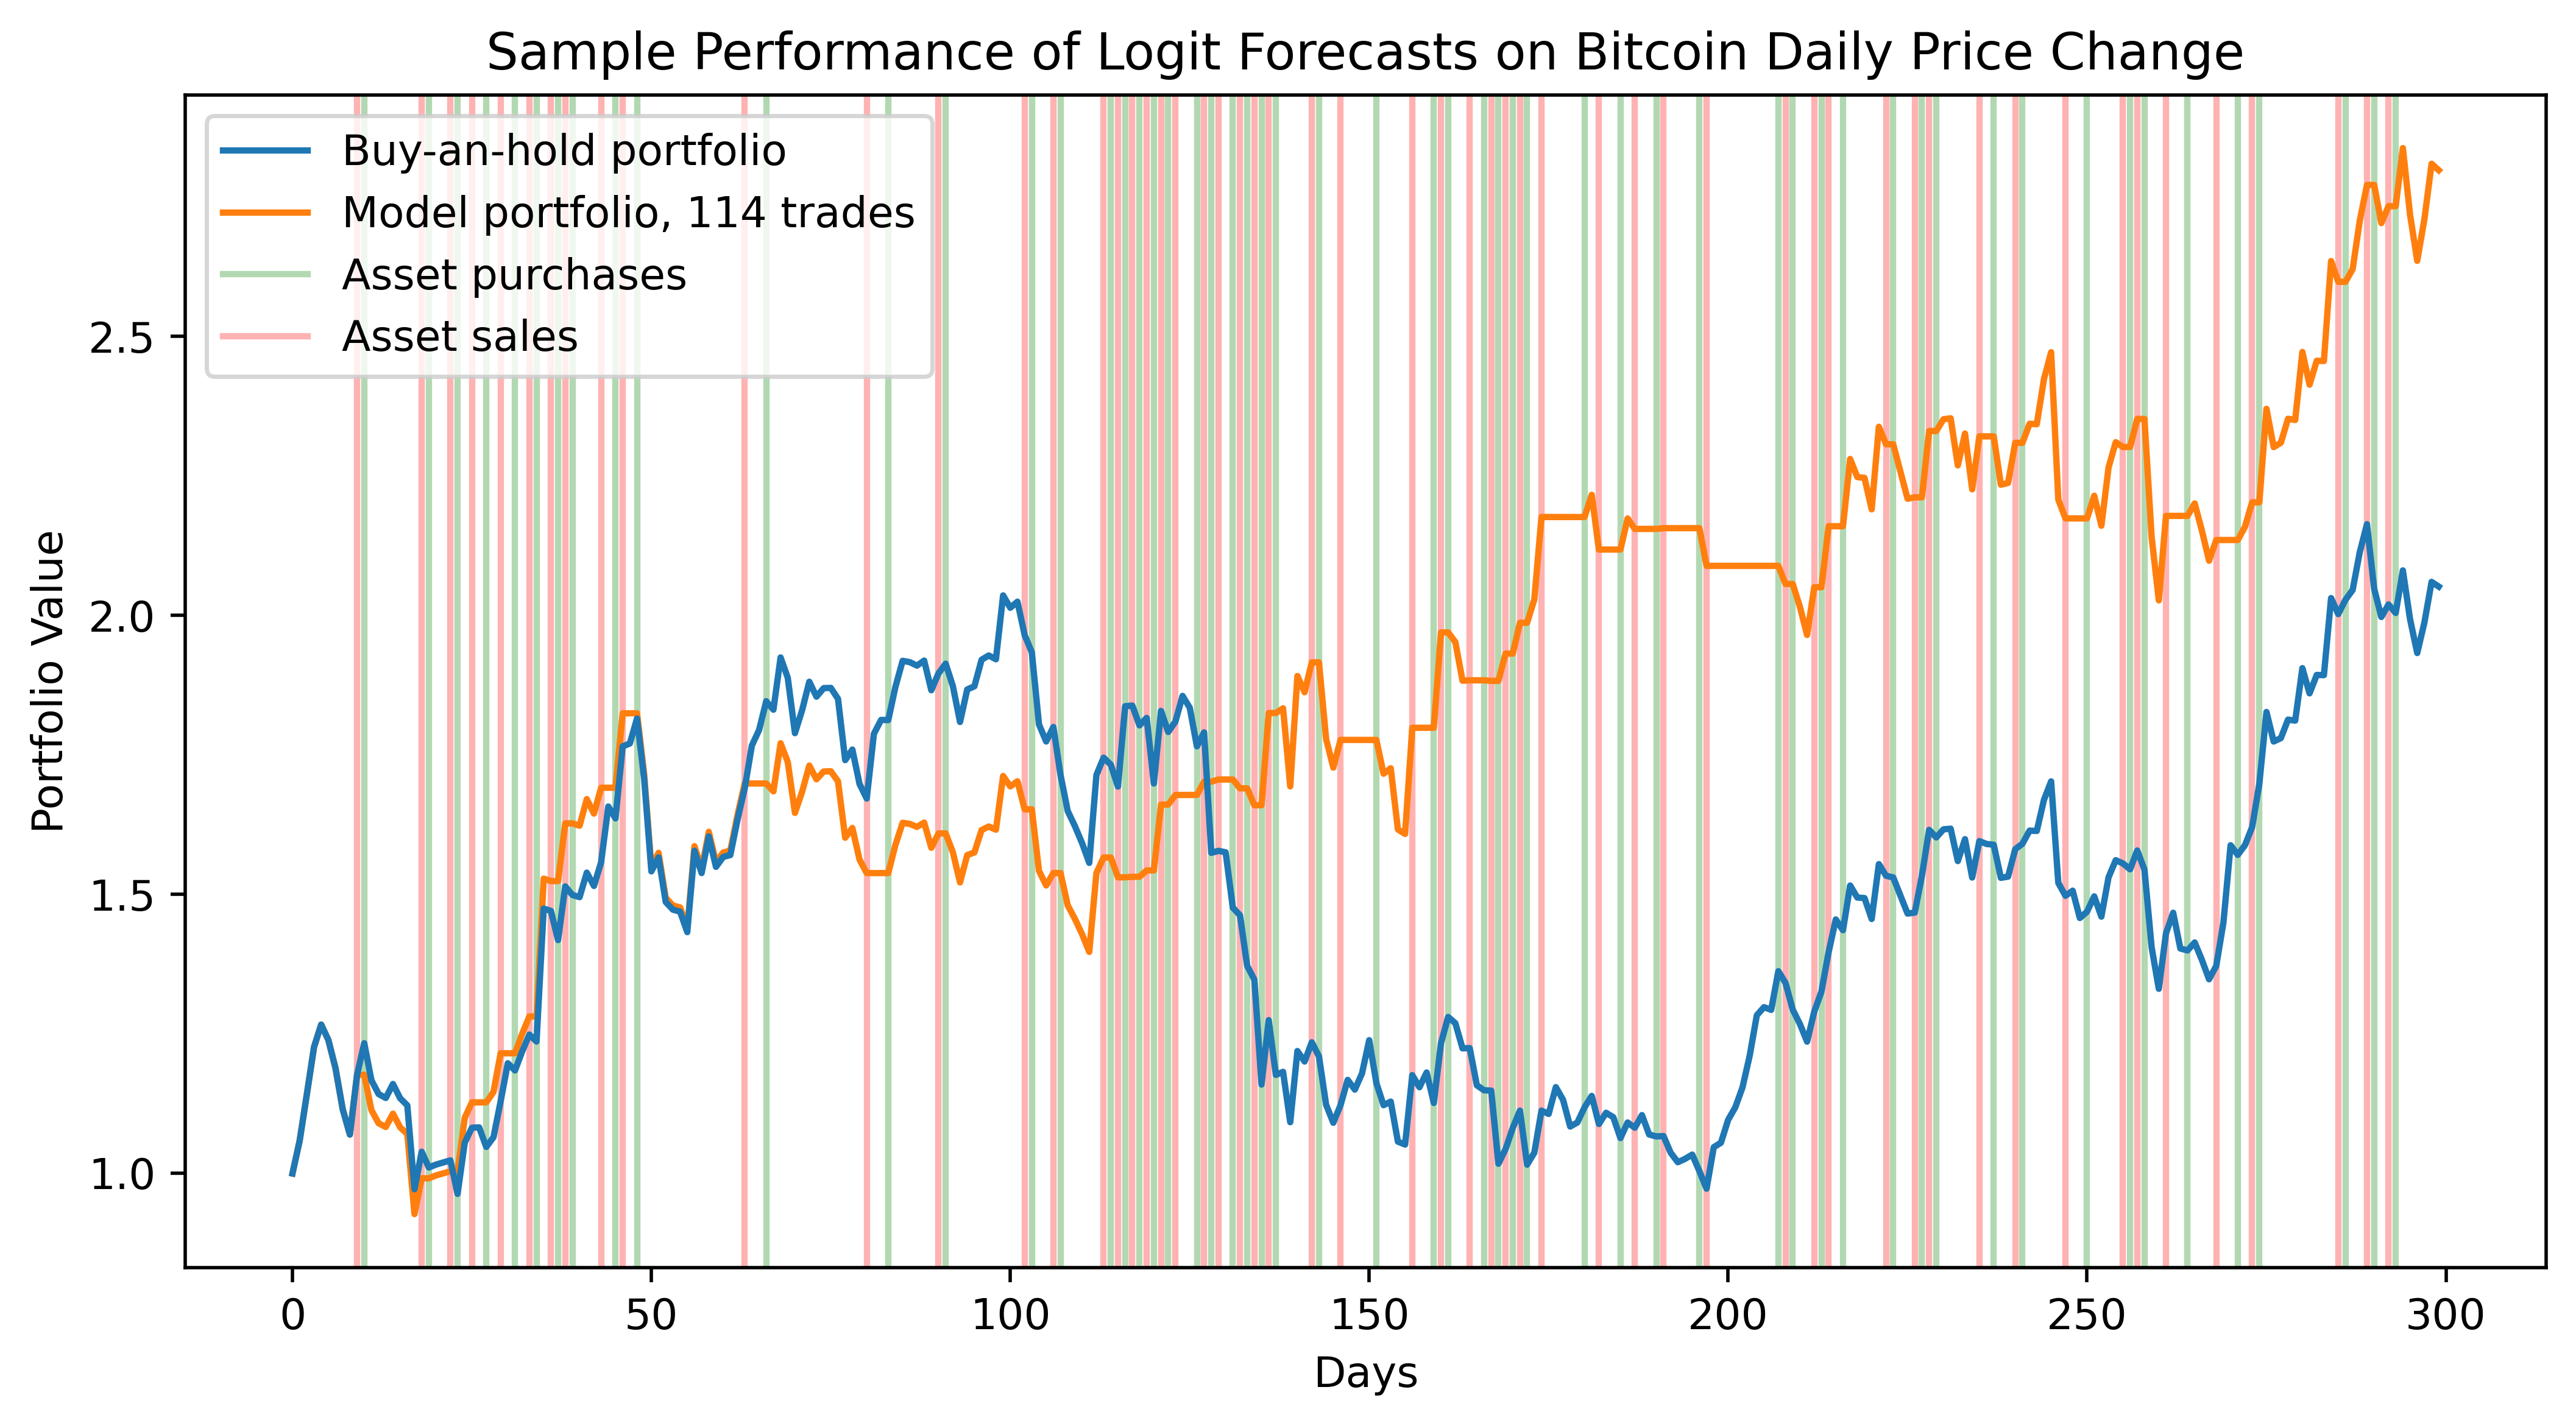

In [22]:
ax = plot_performace(price_data_test, y_pred, 'movement')
plt.title('Sample Performance of Logit Forecasts on Bitcoin Daily Price Change')
loc = plticker.MultipleLocator(base=0.5) # this locator puts ticks at regular intervals
ax.yaxis.set_major_locator(loc)
plt.show()

### BTC 7d extrema

In [23]:
%%capture
timeframe = 7

with open(f'../../4_eda/{coin}_causality/{coin}_price_min_{timeframe}d_causality.txt') as f:
    price_min_vars = f.read().splitlines()
with open(f'../../4_eda/{coin}_causality/{coin}_price_max_{timeframe}d_causality.txt') as f:
    price_max_vars = f.read().splitlines()
X_min = data[price_min_vars]
X_max = data[price_max_vars]

X_min_train = X_min
X_min_test = X_min.tail(800).head(300)
X_max_train = X_max
X_max_test = X_max.tail(800).head(300)
targets_train = targets
targets_test = targets.tail(800).head(300)
price_data_test = price_data.tail(800).head(300)

y_min_train = targets_train[f'{coin}_price_min_{timeframe}d']
y_max_train = targets_train[f'{coin}_price_max_{timeframe}d']
y_min_test = targets_test[f'{coin}_price_min_{timeframe}d']
y_min_test = targets_test[f'{coin}_price_max_{timeframe}d']

model_config = {
    'class_weight': {0: 1, 1: 18.96663991337921},
    'C': 1185.228982762227,
    'solver': 'saga',
    'max_iter': 1000,
    'random_state': 42,
}
min_model = LogisticRegression(**model_config).fit(X_min_train, y_min_train)
max_model = LogisticRegression(**model_config).fit(X_max_train, y_max_train)

y_min_pred = min_model.predict_proba(X_min_test)[:,1]
y_min_pred = (y_min_pred >= 0.91) * 1
y_min_pred = pd.Series(y_min_pred, index=X_min_test.index)

y_max_pred = max_model.predict_proba(X_max_test)[:,1]
y_max_pred = (y_max_pred >= 0.91) * 1
y_max_pred = pd.Series(y_max_pred, index=X_max_test.index)

y_pred = pd.DataFrame({
    'min': y_min_pred,
    'max': y_max_pred,
})

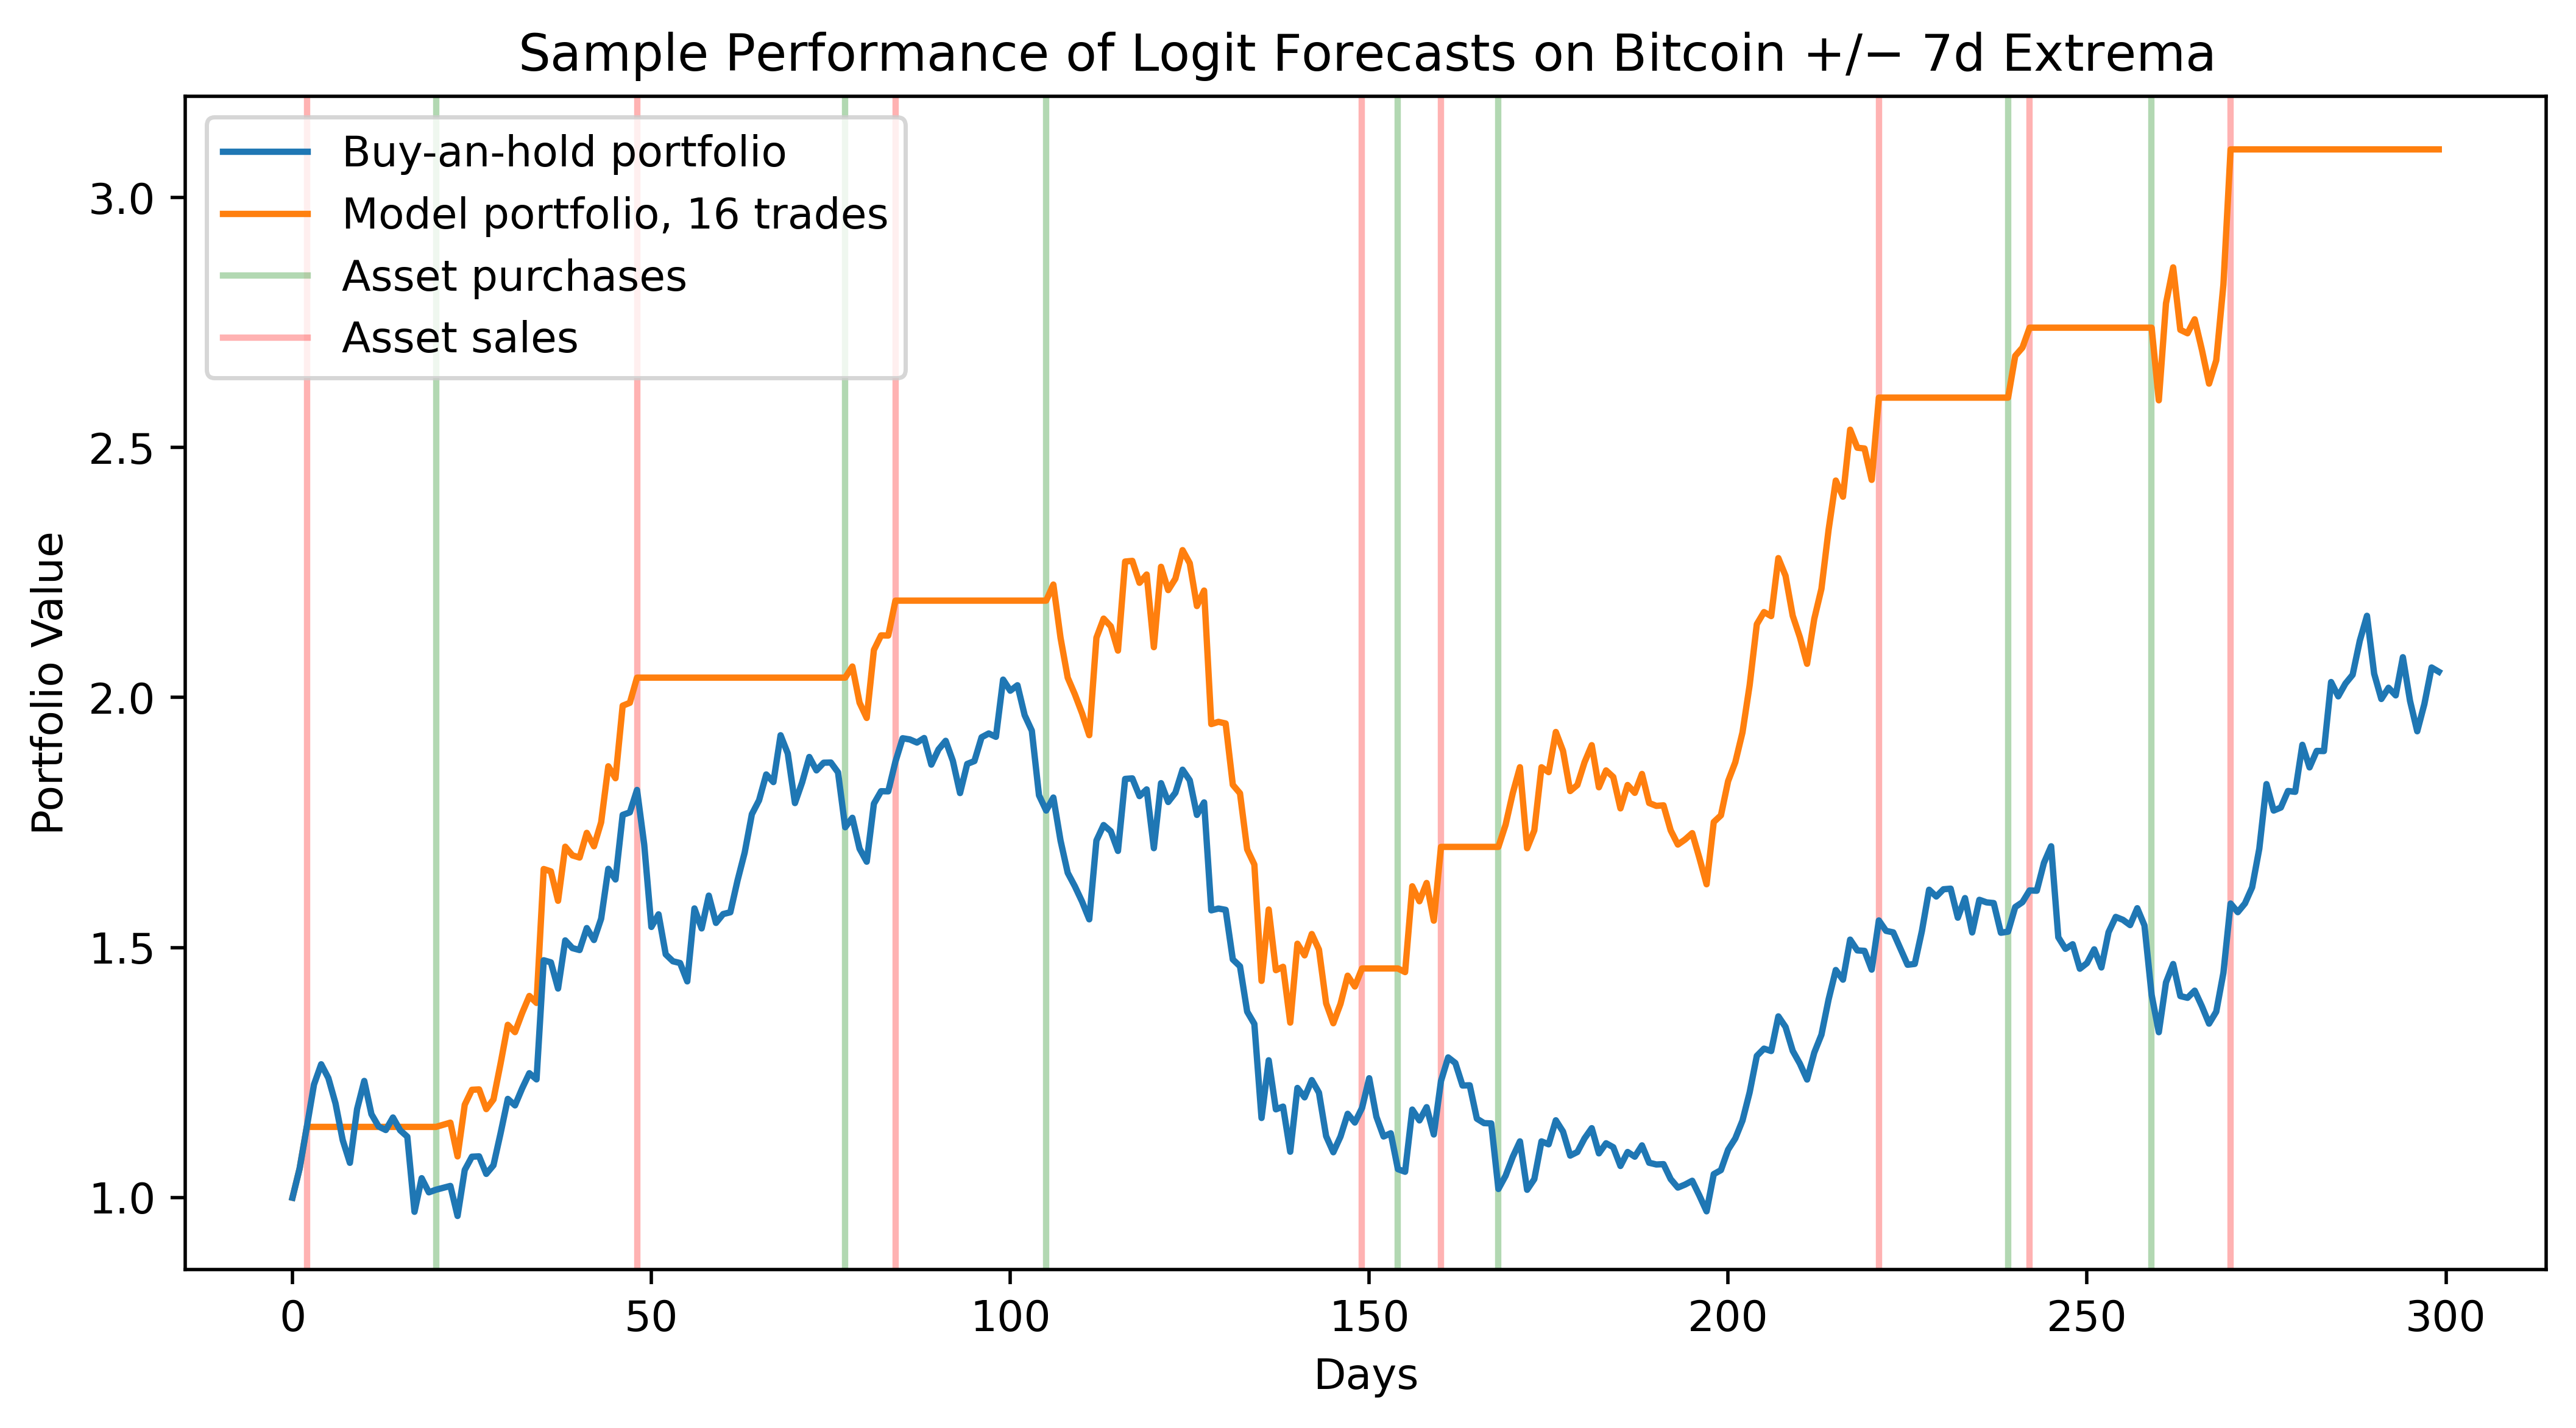

In [24]:
ax = plot_performace(price_data_test, y_pred, 'extrema')
plt.title(f'Sample Performance of Logit Forecasts on Bitcoin +/$-$ {timeframe}d Extrema')
loc = plticker.MultipleLocator(base=0.5) # this locator puts ticks at regular intervals
ax.yaxis.set_major_locator(loc)
plt.show()

### BTC 14d extrema

In [25]:
%%capture
timeframe = 14

with open(f'../../4_eda/{coin}_causality/{coin}_price_min_{timeframe}d_causality.txt') as f:
    price_min_vars = f.read().splitlines()
with open(f'../../4_eda/{coin}_causality/{coin}_price_max_{timeframe}d_causality.txt') as f:
    price_max_vars = f.read().splitlines()
X_min = data[price_min_vars]
X_max = data[price_max_vars]

X_min_train = X_min
X_min_test = X_min.tail(800).head(300)
X_max_train = X_max
X_max_test = X_max.tail(800).head(300)
targets_train = targets
targets_test = targets.tail(800).head(300)
price_data_test = price_data.tail(800).head(300)

y_min_train = targets_train[f'{coin}_price_min_{timeframe}d']
y_max_train = targets_train[f'{coin}_price_max_{timeframe}d']
y_min_test = targets_test[f'{coin}_price_min_{timeframe}d']
y_min_test = targets_test[f'{coin}_price_max_{timeframe}d']

model_config = {
    'class_weight': {0: 1, 1: 9.442633540808764},
    'C': 10,
    'solver': 'saga',
    'max_iter': 1000,
    'random_state': 42,
}
min_model = LogisticRegression(**model_config).fit(X_min_train, y_min_train)
max_model = LogisticRegression(**model_config).fit(X_max_train, y_max_train)

y_min_pred = min_model.predict_proba(X_min_test)[:,1]
y_min_pred = (y_min_pred >= 0.6) * 1
y_min_pred = pd.Series(y_min_pred, index=X_min_test.index)

y_max_pred = max_model.predict_proba(X_max_test)[:,1]
y_max_pred = (y_max_pred >= 0.5) * 1
y_max_pred = pd.Series(y_max_pred, index=X_max_test.index)

y_pred = pd.DataFrame({
    'min': y_min_pred,
    'max': y_max_pred,
})

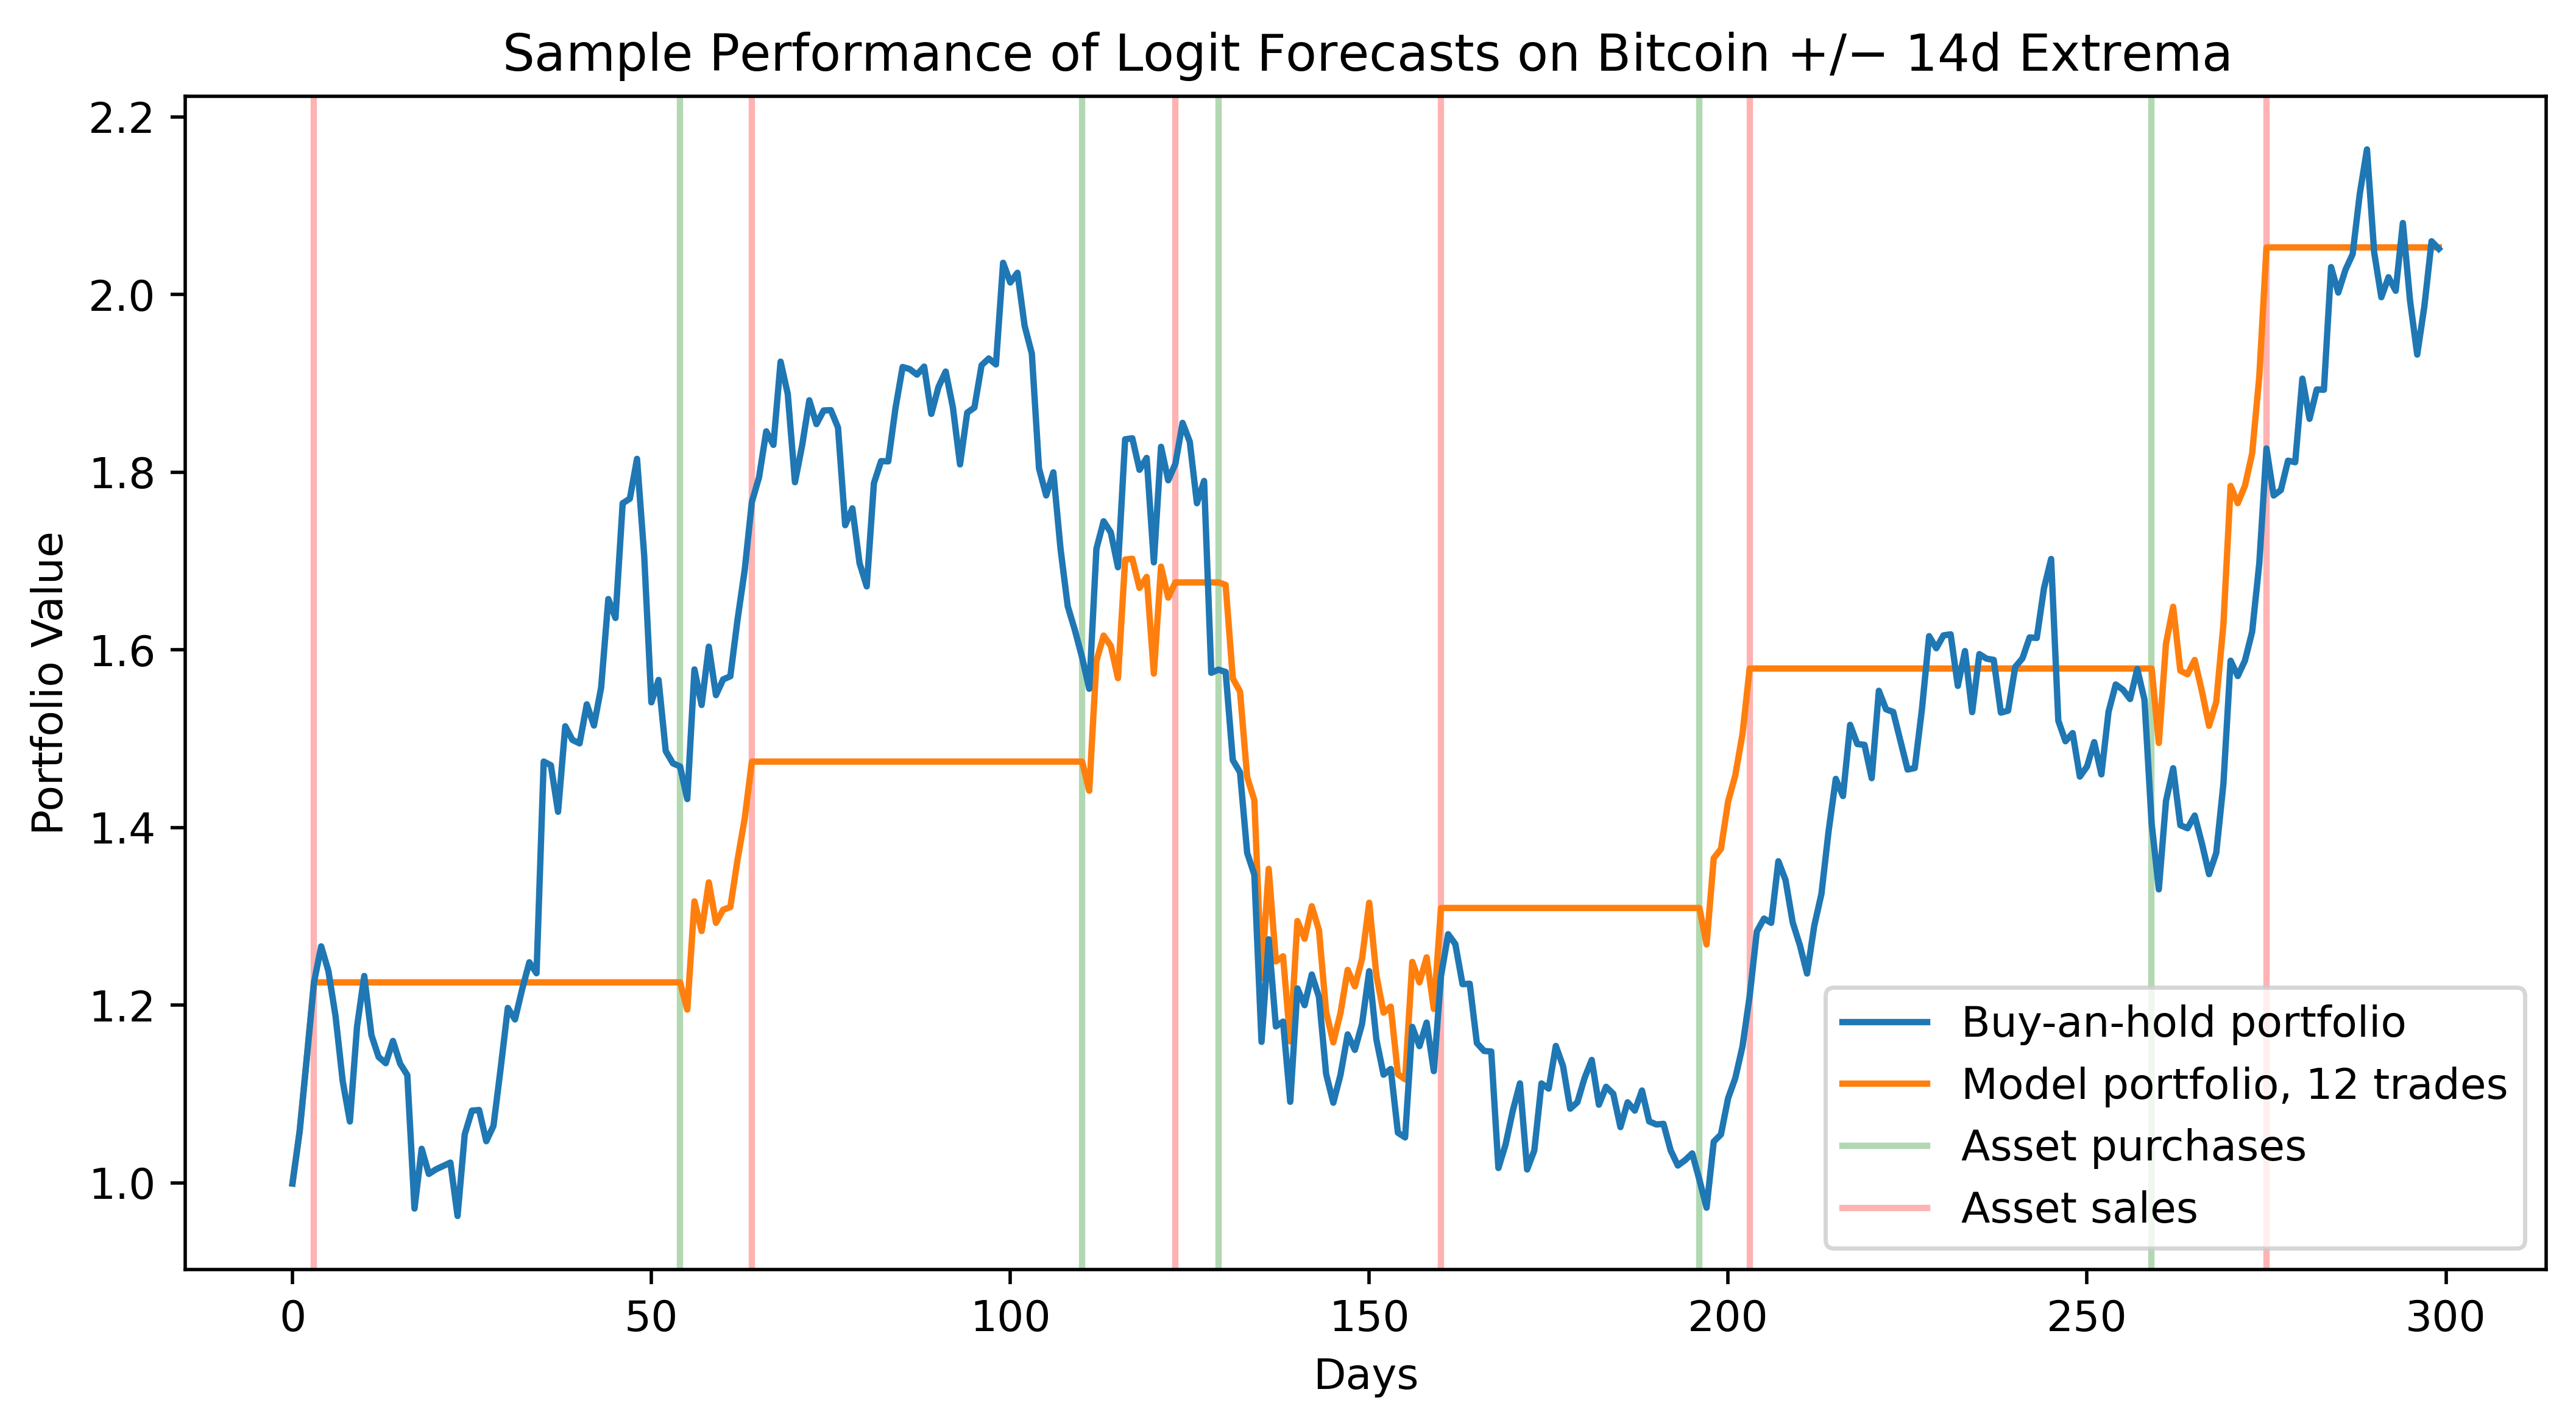

In [26]:
ax = plot_performace(price_data_test, y_pred, 'extrema')
plt.title(f'Sample Performance of Logit Forecasts on Bitcoin +/$-$ {timeframe}d Extrema')
plt.show()

### BTC 21d extrema

In [27]:
%%capture
timeframe = 21

with open(f'../../4_eda/{coin}_causality/{coin}_price_min_{timeframe}d_causality.txt') as f:
    price_min_vars = f.read().splitlines()
with open(f'../../4_eda/{coin}_causality/{coin}_price_max_{timeframe}d_causality.txt') as f:
    price_max_vars = f.read().splitlines()
X_min = data[price_min_vars]
X_max = data[price_max_vars]

X_min_train = X_min
X_min_test = X_min.tail(800).head(300)
X_max_train = X_max
X_max_test = X_max.tail(800).head(300)
targets_train = targets
targets_test = targets.tail(800).head(300)
price_data_test = price_data.tail(800).head(300)

y_min_train = targets_train[f'{coin}_price_min_{timeframe}d']
y_max_train = targets_train[f'{coin}_price_max_{timeframe}d']
y_min_test = targets_test[f'{coin}_price_min_{timeframe}d']
y_min_test = targets_test[f'{coin}_price_max_{timeframe}d']

model_config = {
    'class_weight': {0: 1, 1: 19.308576902552936},
    'C': 0.011074461760888015,
    'solver': 'sag',
    'max_iter': 1000,
    'random_state': 42,
}
min_model = LogisticRegression(**model_config).fit(X_min_train, y_min_train)
max_model = LogisticRegression(**model_config).fit(X_max_train, y_max_train)

y_min_pred = min_model.predict_proba(X_min_test)[:,1]
y_min_pred = (y_min_pred >= 0.8) * 1
y_min_pred = pd.Series(y_min_pred, index=X_min_test.index)

y_max_pred = max_model.predict_proba(X_max_test)[:,1]
y_max_pred = (y_max_pred >= 0.8) * 1
y_max_pred = pd.Series(y_max_pred, index=X_max_test.index)

y_pred = pd.DataFrame({
    'min': y_min_pred,
    'max': y_max_pred,
})

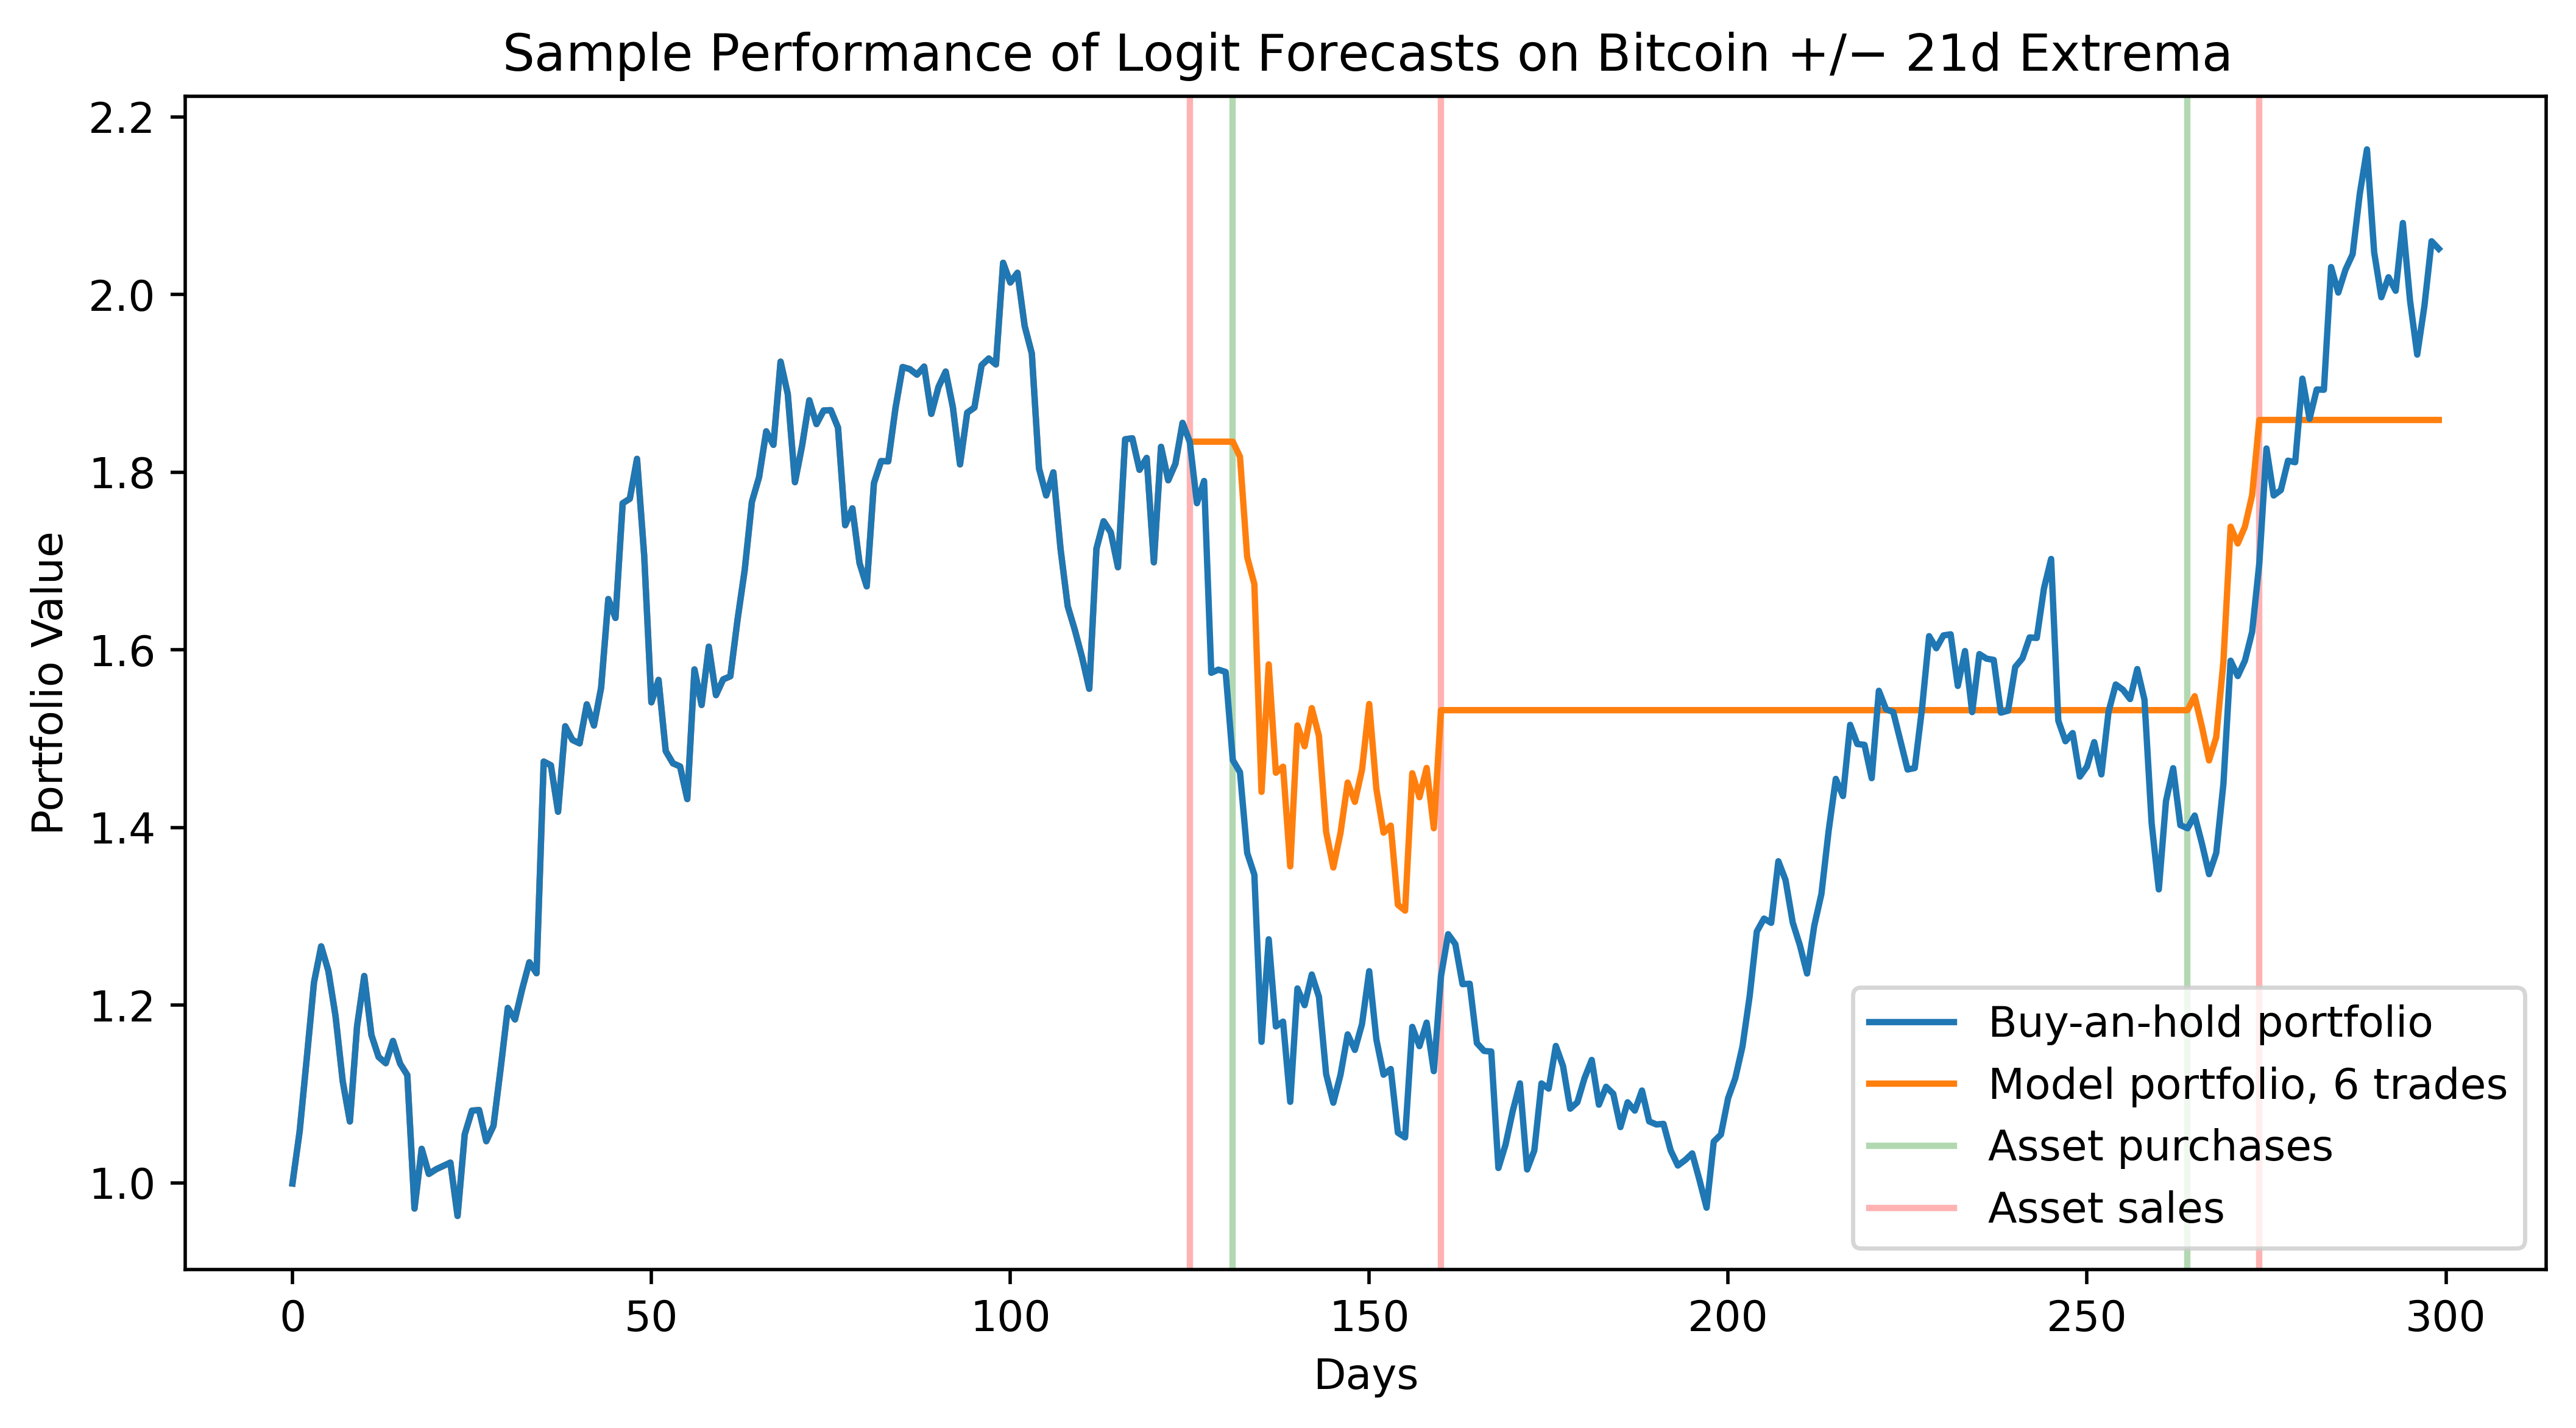

In [28]:
ax = plot_performace(price_data_test, y_pred, 'extrema')
plt.title(f'Sample Performance of Logit Forecasts on Bitcoin +/$-$ {timeframe}d Extrema')
plt.show()

### ETH Movement

In [29]:
coin = 'eth'

In [30]:
data = pd.read_parquet(f'../../4_eda/{coin}_stationary_data_lagged.parquet.gzip')
data.columns = data.columns.map('_'.join)
data = (data.fillna(method='ffill')
            .fillna(0)
            .replace([np.inf, -np.inf], 0))
targets = pd.read_parquet(f'../../2_data_processing/numeric_data/{coin}_targets.parquet.gzip')
price_data = pd.read_parquet(f'../../2_data_processing/numeric_data/{coin}_price_data.parquet.gzip').iloc[:,0]

In [31]:
%%capture
with open(f'../../4_eda/{coin}_causality/{coin}_price_log_difference_causality.txt') as f:
    price_log_difference_vars = f.read().splitlines()
X = data[price_log_difference_vars]

X_train = X
X_test = X.tail(800).head(300)
targets_train = targets
targets_test = targets.tail(800).head(300)
price_data_test = price_data.tail(800).head(300)

y_train = (targets_train[f'{coin}_price_log_difference'] > 0) * 1
y_test = (targets_test[f'{coin}_price_log_difference'] > 0) * 1

model_config = {
    # 'class_weight': {0: 1, 1: 1.1502551910751493},
    'C': 0.07247286217361955,
    'solver': 'saga',
    'max_iter': 1000,
    'random_state': 42,
}
model = LogisticRegression(**model_config).fit(X_train, y_train)

y_pred = model.predict_proba(X_test)[:,1]
y_pred = (y_pred >= 0.5) * 1
y_pred = pd.Series(y_pred, index=X_test.index)

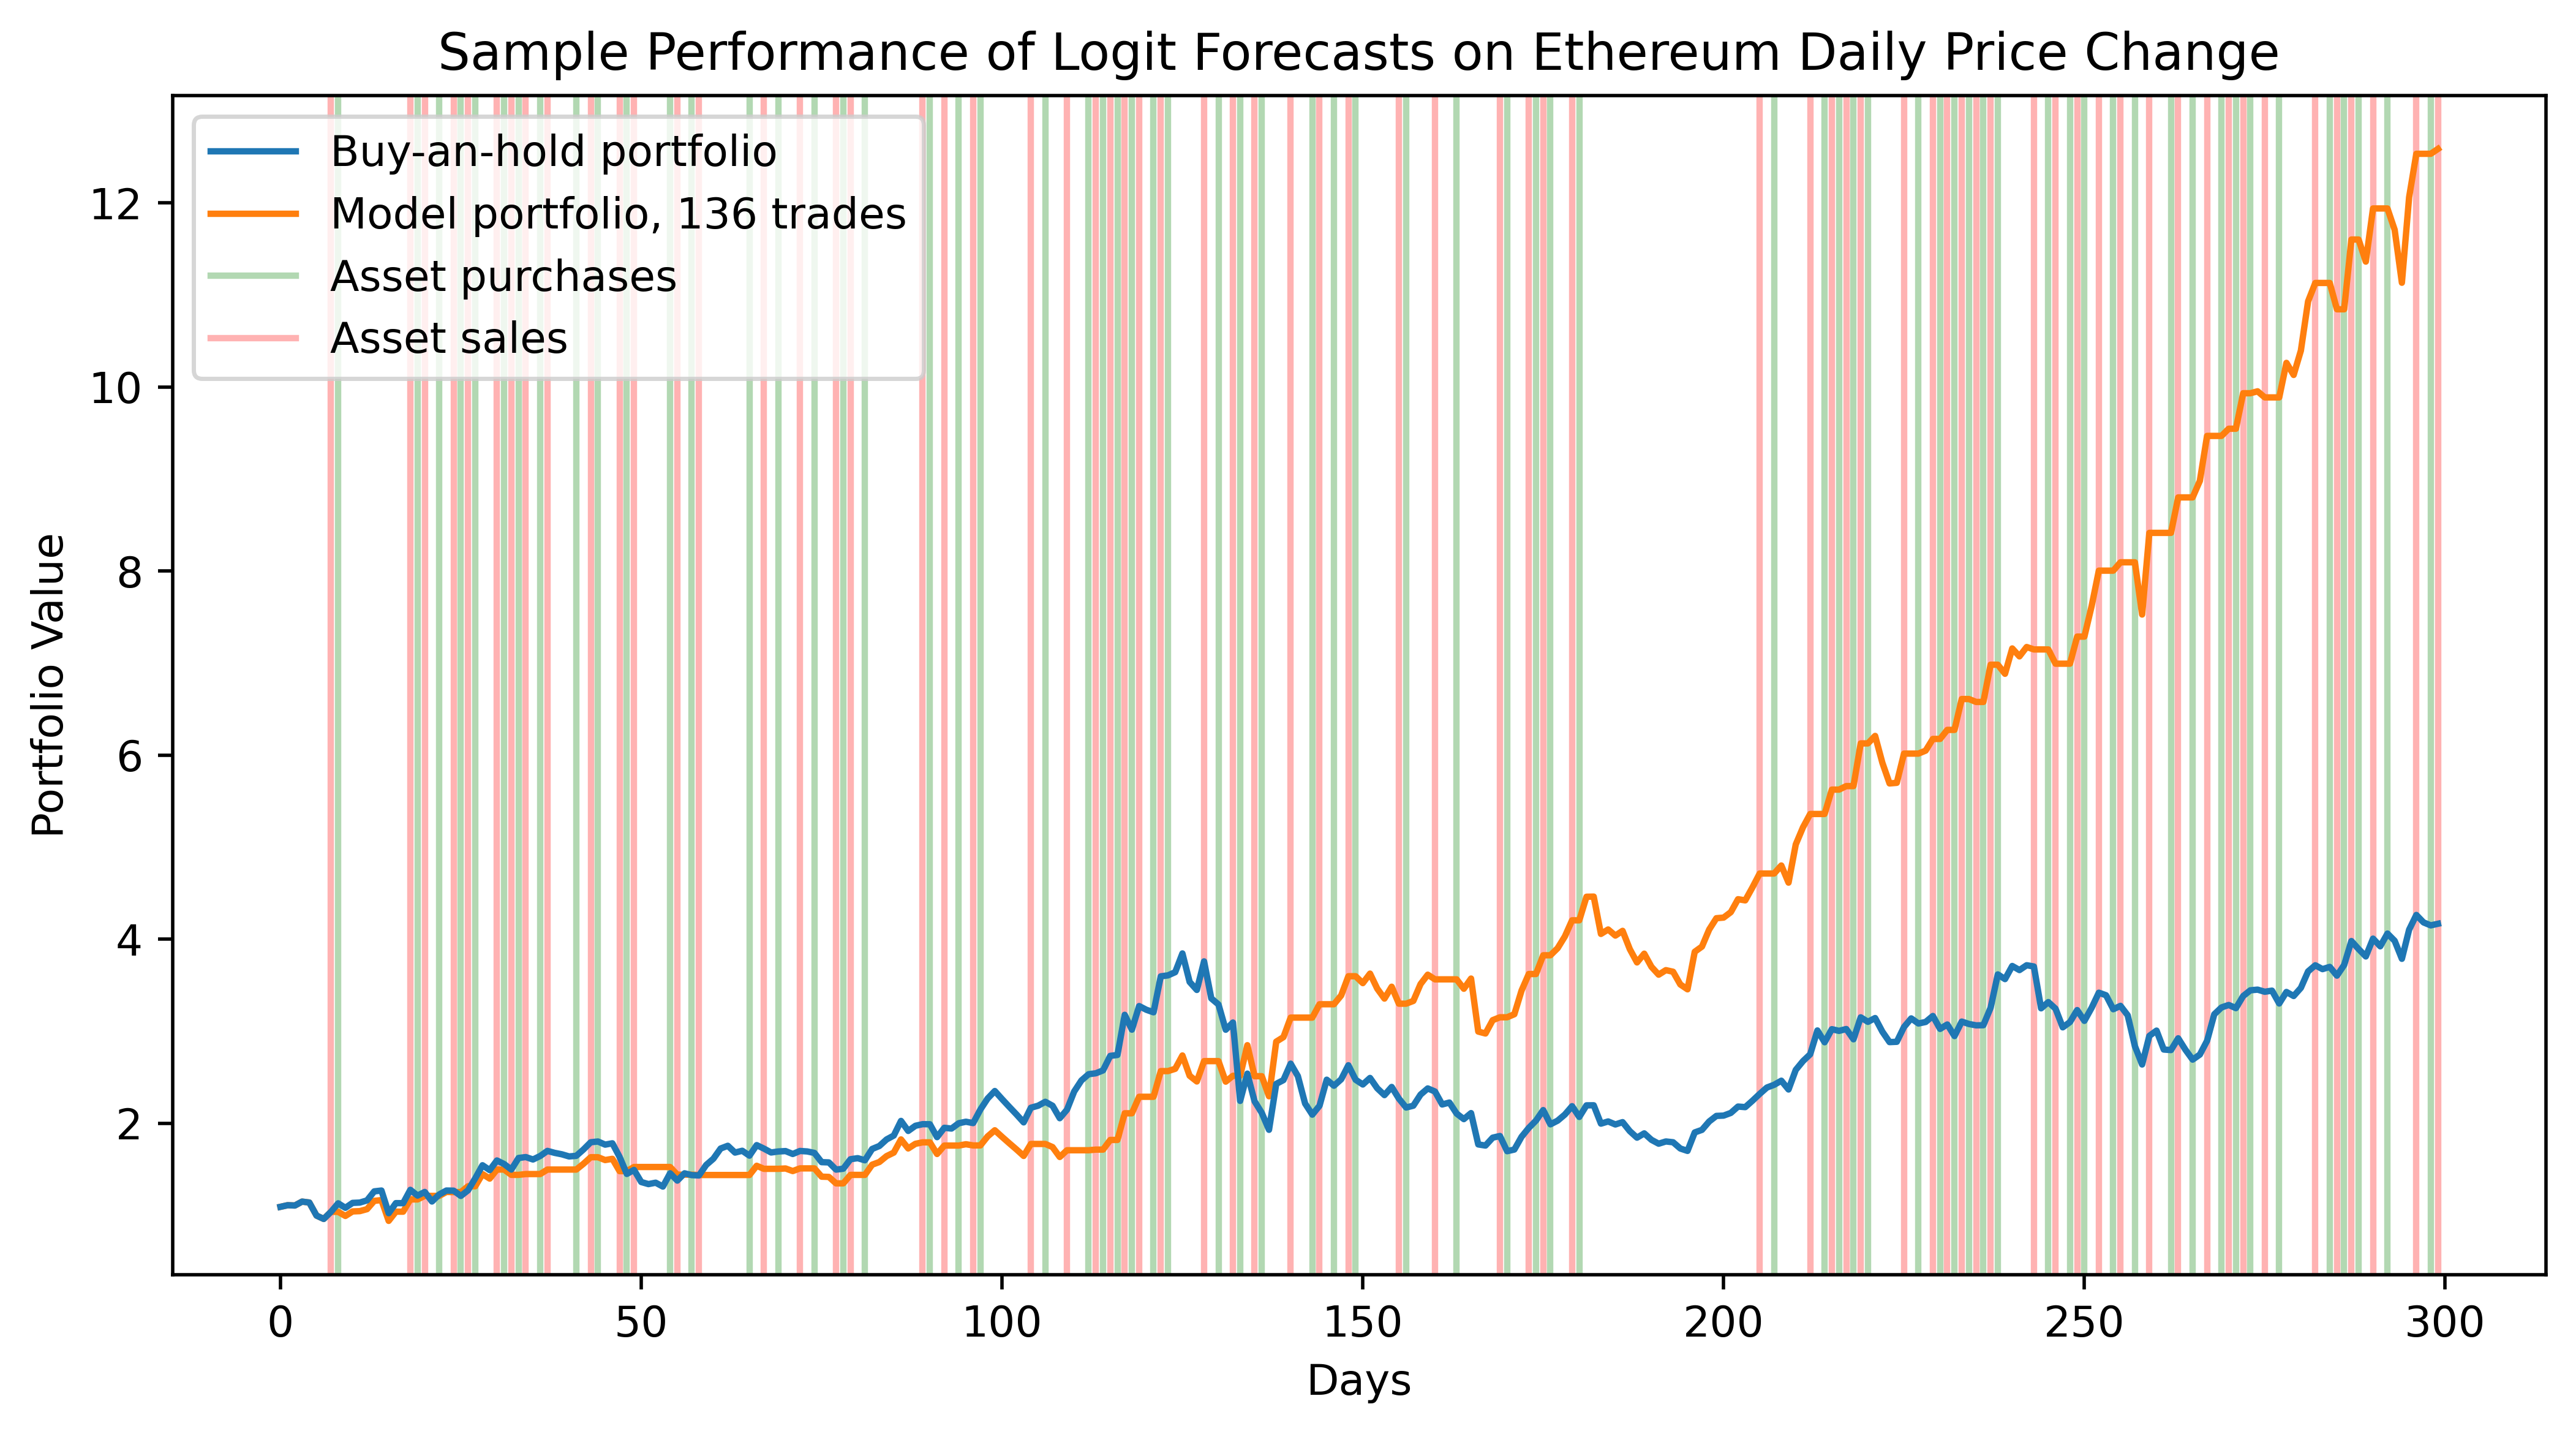

In [32]:
ax = plot_performace(price_data_test, y_pred, 'movement')
plt.title('Sample Performance of Logit Forecasts on Ethereum Daily Price Change')
plt.show()

### ETH 7d extrema

In [33]:
%%capture
timeframe = 7

with open(f'../../4_eda/{coin}_causality/{coin}_price_min_{timeframe}d_causality.txt') as f:
    price_min_vars = f.read().splitlines()
with open(f'../../4_eda/{coin}_causality/{coin}_price_max_{timeframe}d_causality.txt') as f:
    price_max_vars = f.read().splitlines()
X_min = data[price_min_vars]
X_max = data[price_max_vars]

X_min_train = X_min
X_min_test = X_min.tail(800).head(300)
X_max_train = X_max
X_max_test = X_max.tail(800).head(300)
targets_train = targets
targets_test = targets.tail(800).head(300)
price_data_test = price_data.tail(800).head(300)

y_min_train = targets_train[f'{coin}_price_min_{timeframe}d']
y_max_train = targets_train[f'{coin}_price_max_{timeframe}d']
y_min_test = targets_test[f'{coin}_price_min_{timeframe}d']
y_min_test = targets_test[f'{coin}_price_max_{timeframe}d']

model_config = {
    'class_weight': {0: 1, 1: 18.96663991337921},
    'C': 1185.228982762227,
    'solver': 'saga',
    'max_iter': 1000,
    'random_state': 42,
}
min_model = LogisticRegression(**model_config).fit(X_min_train, y_min_train)
max_model = LogisticRegression(**model_config).fit(X_max_train, y_max_train)

y_min_pred = min_model.predict_proba(X_min_test)[:,1]
y_min_pred = (y_min_pred >= 0.6) * 1
y_min_pred = pd.Series(y_min_pred, index=X_min_test.index)

y_max_pred = max_model.predict_proba(X_max_test)[:,1]
y_max_pred = (y_max_pred >= 0.6) * 1
y_max_pred = pd.Series(y_max_pred, index=X_max_test.index)

y_pred = pd.DataFrame({
    'min': y_min_pred,
    'max': y_max_pred,
})

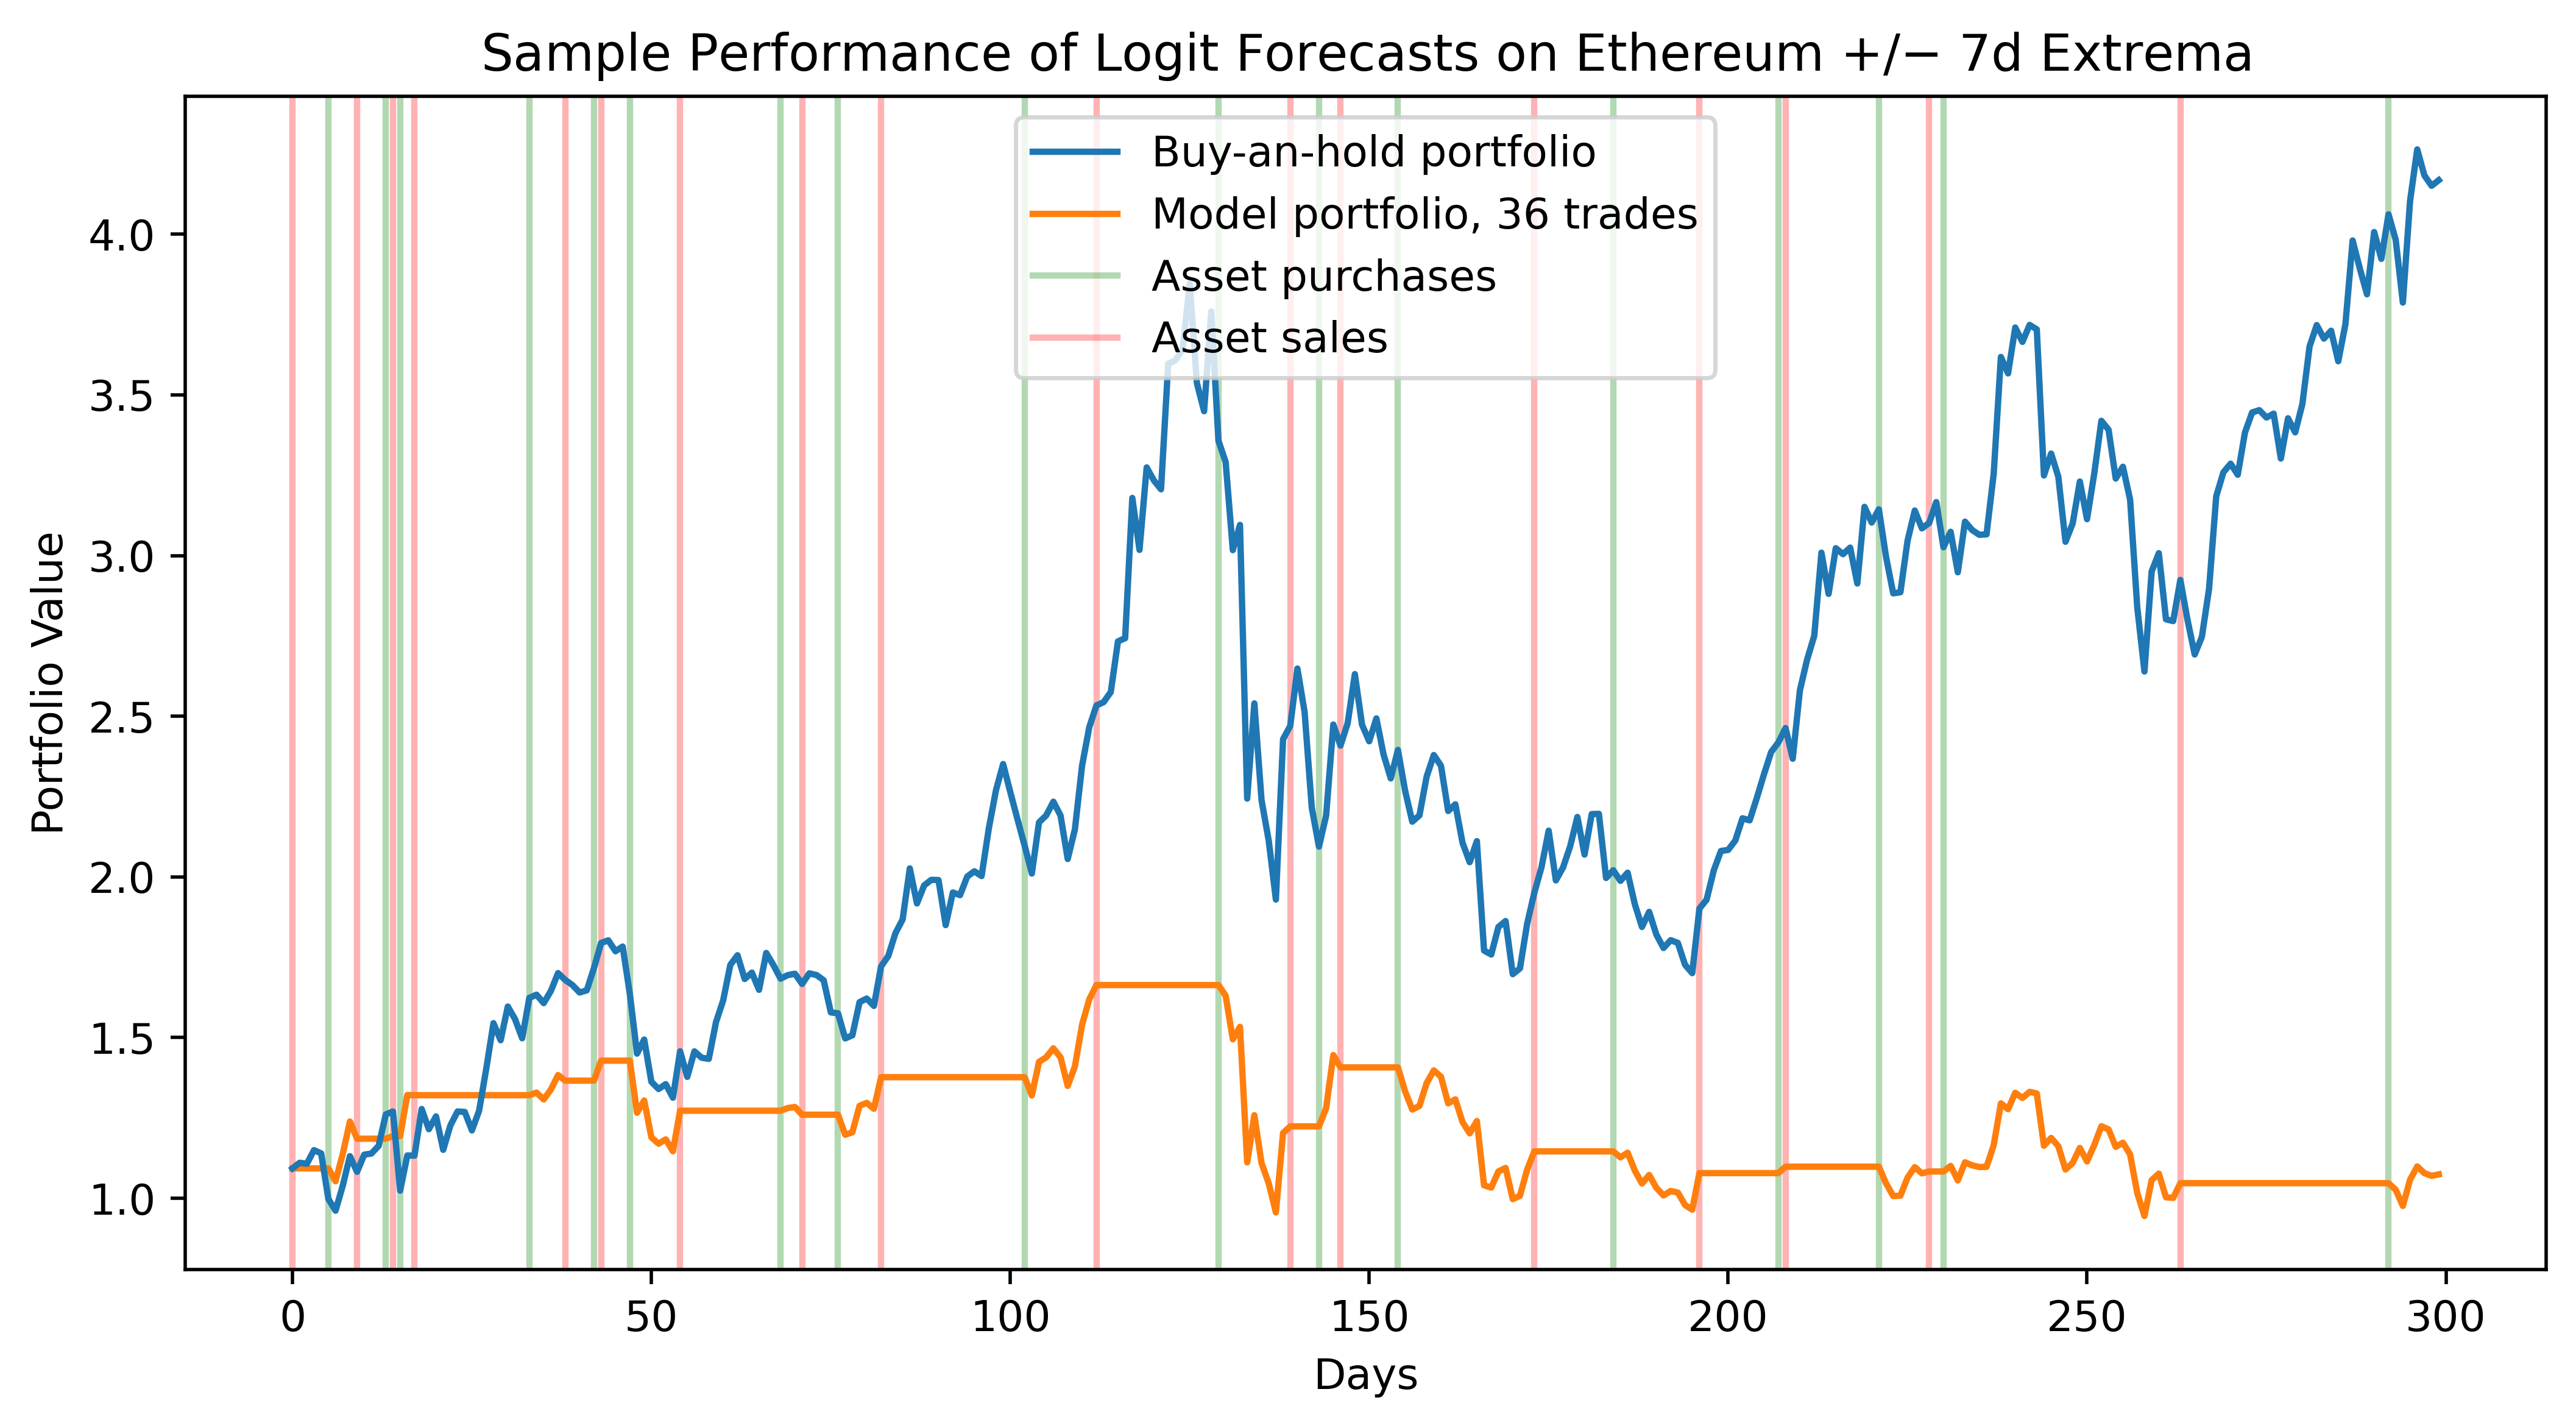

In [34]:
ax = plot_performace(price_data_test, y_pred, 'extrema')
plt.title(f'Sample Performance of Logit Forecasts on Ethereum +/$-$ {timeframe}d Extrema')
plt.show()

### ETH 14d extrema

In [35]:
%%capture
timeframe = 14

with open(f'../../4_eda/{coin}_causality/{coin}_price_min_{timeframe}d_causality.txt') as f:
    price_min_vars = f.read().splitlines()
with open(f'../../4_eda/{coin}_causality/{coin}_price_max_{timeframe}d_causality.txt') as f:
    price_max_vars = f.read().splitlines()
X_min = data[price_min_vars]
X_max = data[price_max_vars]

X_min_train = X_min
X_min_test = X_min.tail(800).head(300)
X_max_train = X_max
X_max_test = X_max.tail(800).head(300)
targets_train = targets
targets_test = targets.tail(800).head(300)
price_data_test = price_data.tail(800).head(300)

y_min_train = targets_train[f'{coin}_price_min_{timeframe}d']
y_max_train = targets_train[f'{coin}_price_max_{timeframe}d']
y_min_test = targets_test[f'{coin}_price_min_{timeframe}d']
y_min_test = targets_test[f'{coin}_price_max_{timeframe}d']

model_config = {
    'class_weight': {0: 1, 1: 9.442633540808764},
    'C': 10,
    'solver': 'saga',
    'max_iter': 1000,
    'random_state': 42,
}
min_model = LogisticRegression(**model_config).fit(X_min_train, y_min_train)
max_model = LogisticRegression(**model_config).fit(X_max_train, y_max_train)

y_min_pred = min_model.predict_proba(X_min_test)[:,1]
y_min_pred = (y_min_pred >= 0.5) * 1
y_min_pred = pd.Series(y_min_pred, index=X_min_test.index)

y_max_pred = max_model.predict_proba(X_max_test)[:,1]
y_max_pred = (y_max_pred >= 0.5) * 1
y_max_pred = pd.Series(y_max_pred, index=X_max_test.index)

y_pred = pd.DataFrame({
    'min': y_min_pred,
    'max': y_max_pred,
})

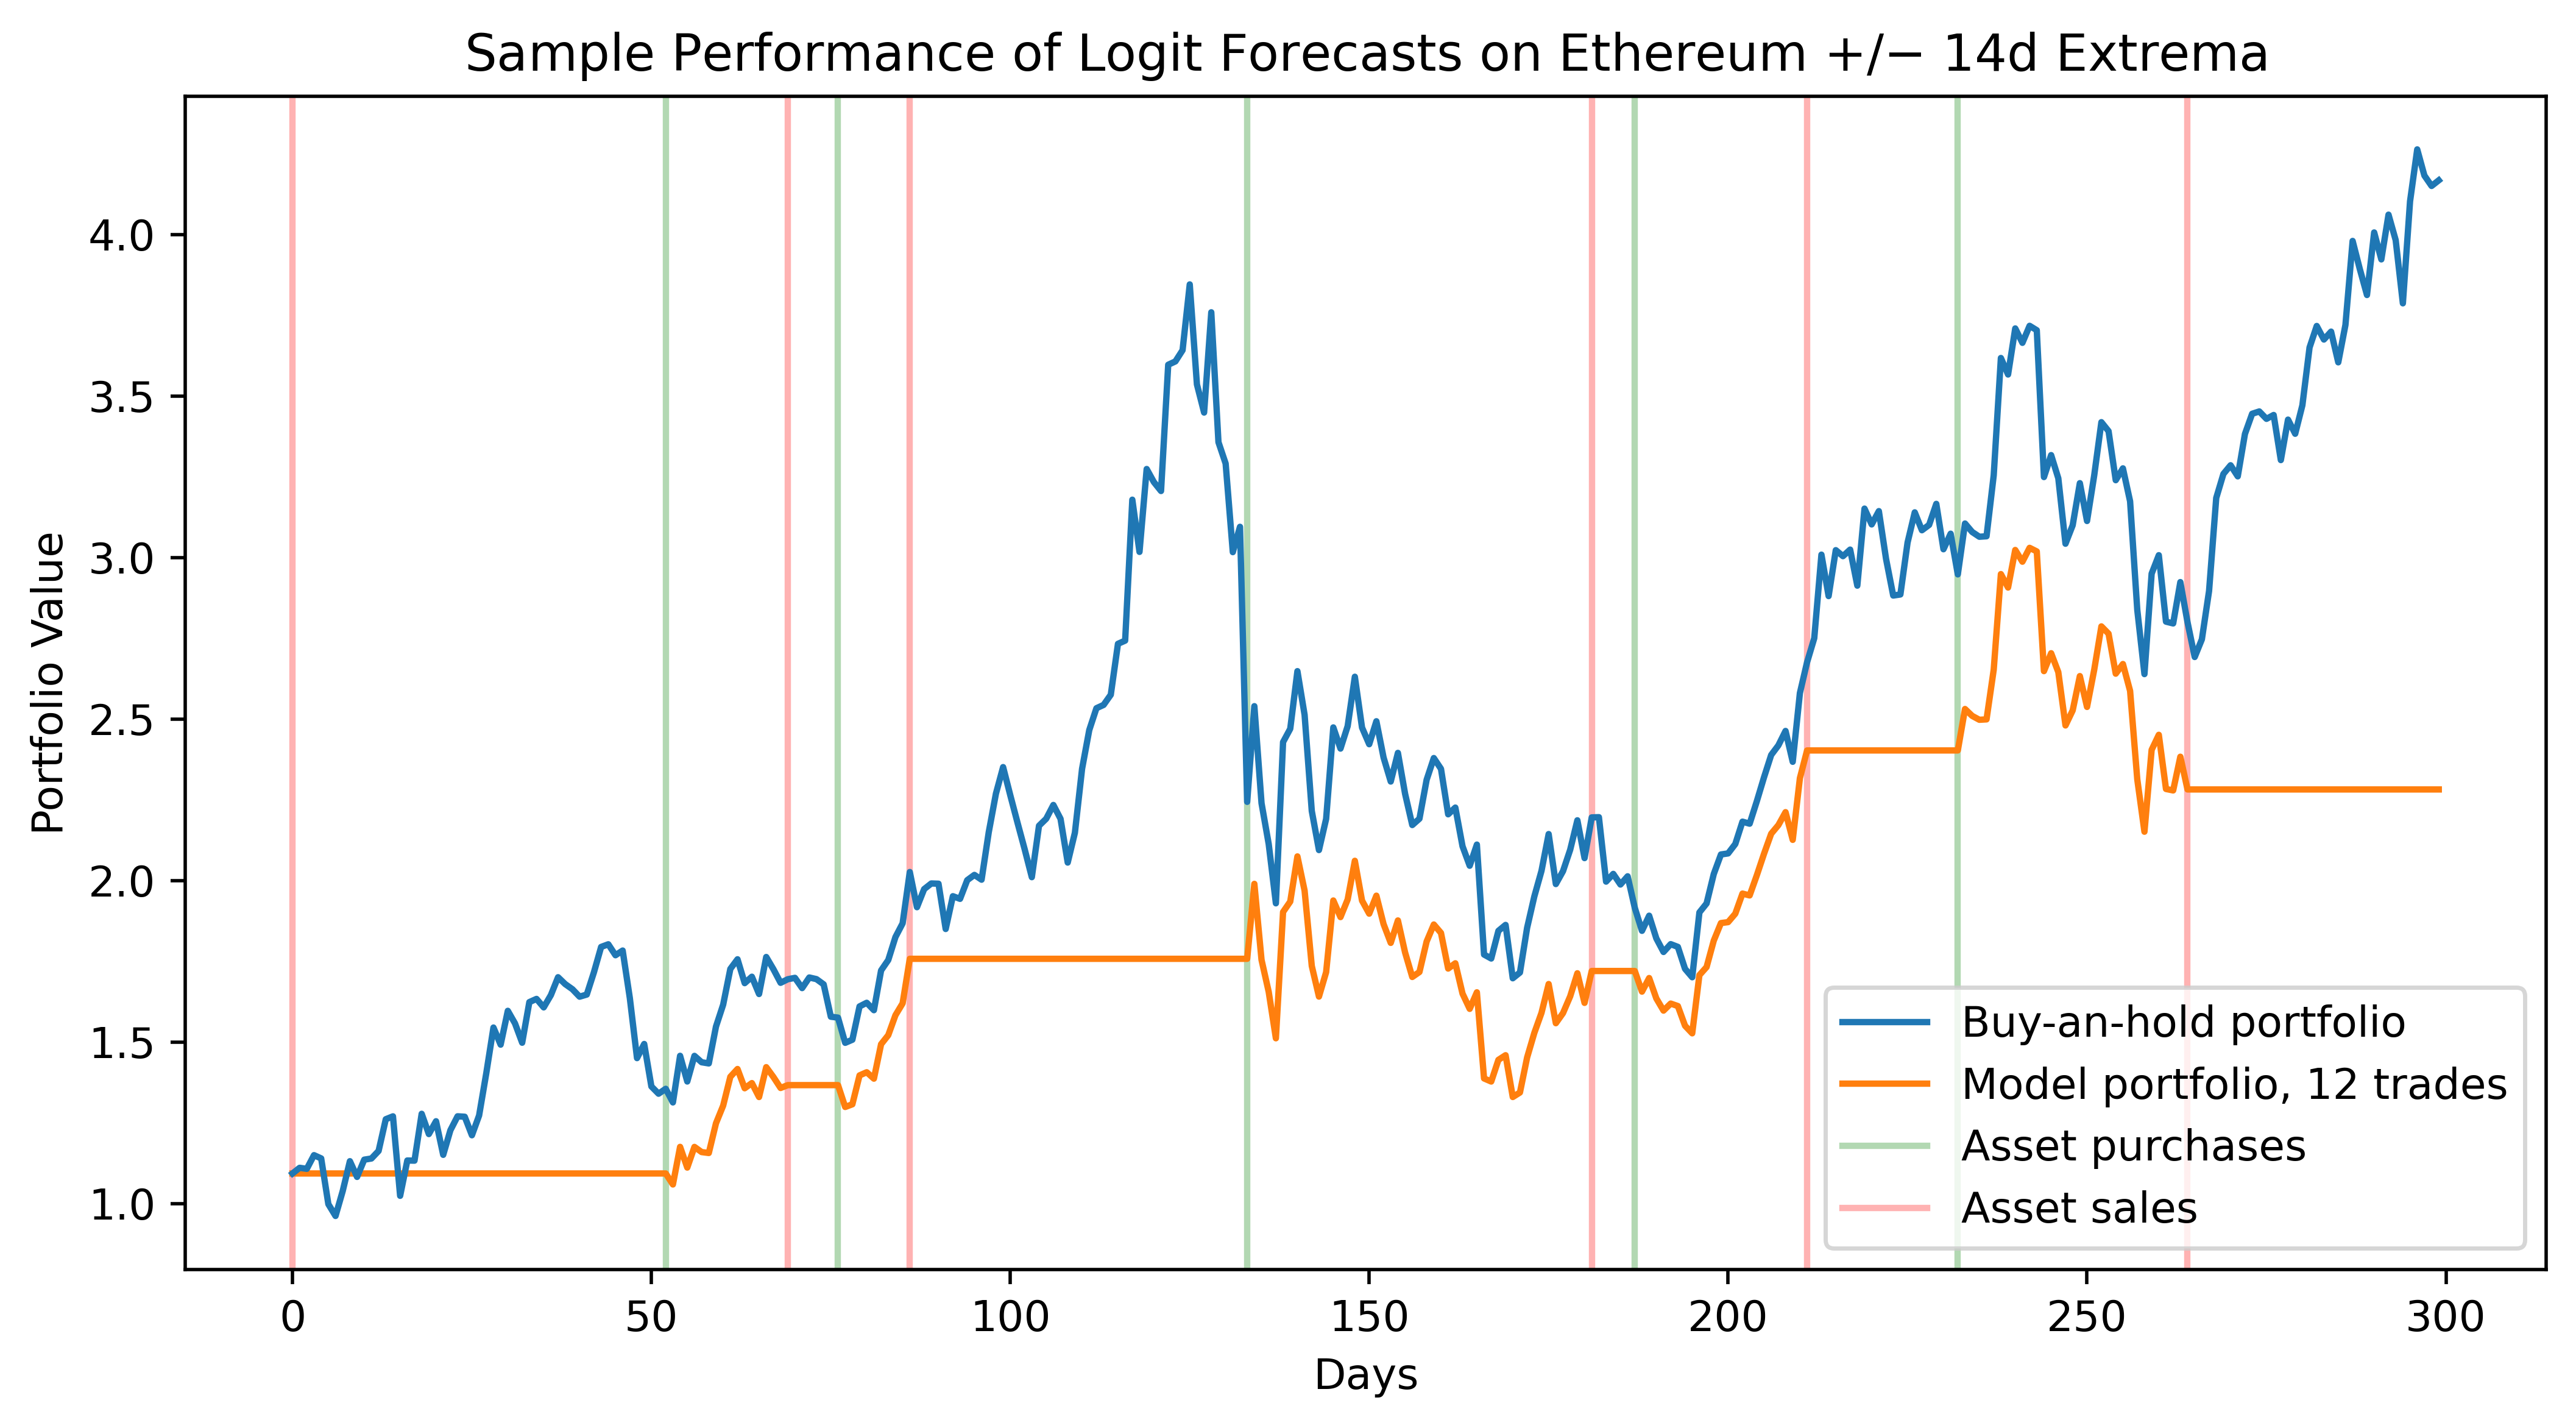

In [36]:
ax = plot_performace(price_data_test, y_pred, 'extrema')
plt.title(f'Sample Performance of Logit Forecasts on Ethereum +/$-$ {timeframe}d Extrema')
plt.show()

### ETH 21d extrema

In [37]:
%%capture
timeframe = 21

with open(f'../../4_eda/{coin}_causality/{coin}_price_min_{timeframe}d_causality.txt') as f:
    price_min_vars = f.read().splitlines()
with open(f'../../4_eda/{coin}_causality/{coin}_price_max_{timeframe}d_causality.txt') as f:
    price_max_vars = f.read().splitlines()
X_min = data[price_min_vars]
X_max = data[price_max_vars]

X_min_train = X_min
X_min_test = X_min.tail(800).head(300)
X_max_train = X_max
X_max_test = X_max.tail(800).head(300)
targets_train = targets
targets_test = targets.tail(800).head(300)
price_data_test = price_data.tail(800).head(300)

y_min_train = targets_train[f'{coin}_price_min_{timeframe}d']
y_max_train = targets_train[f'{coin}_price_max_{timeframe}d']
y_min_test = targets_test[f'{coin}_price_min_{timeframe}d']
y_min_test = targets_test[f'{coin}_price_max_{timeframe}d']

model_config = {
    'class_weight': {0: 1, 1: 19.308576902552936},
    'C': 0.011074461760888015,
    'solver': 'sag',
    'max_iter': 1000,
    'random_state': 42,
}
min_model = LogisticRegression(**model_config).fit(X_min_train, y_min_train)
max_model = LogisticRegression(**model_config).fit(X_max_train, y_max_train)

y_min_pred = min_model.predict_proba(X_min_test)[:,1]
y_min_pred = (y_min_pred >= 0.6) * 1
y_min_pred = pd.Series(y_min_pred, index=X_min_test.index)

y_max_pred = max_model.predict_proba(X_max_test)[:,1]
y_max_pred = (y_max_pred >= 0.6) * 1
y_max_pred = pd.Series(y_max_pred, index=X_max_test.index)

y_pred = pd.DataFrame({
    'min': y_min_pred,
    'max': y_max_pred,
})

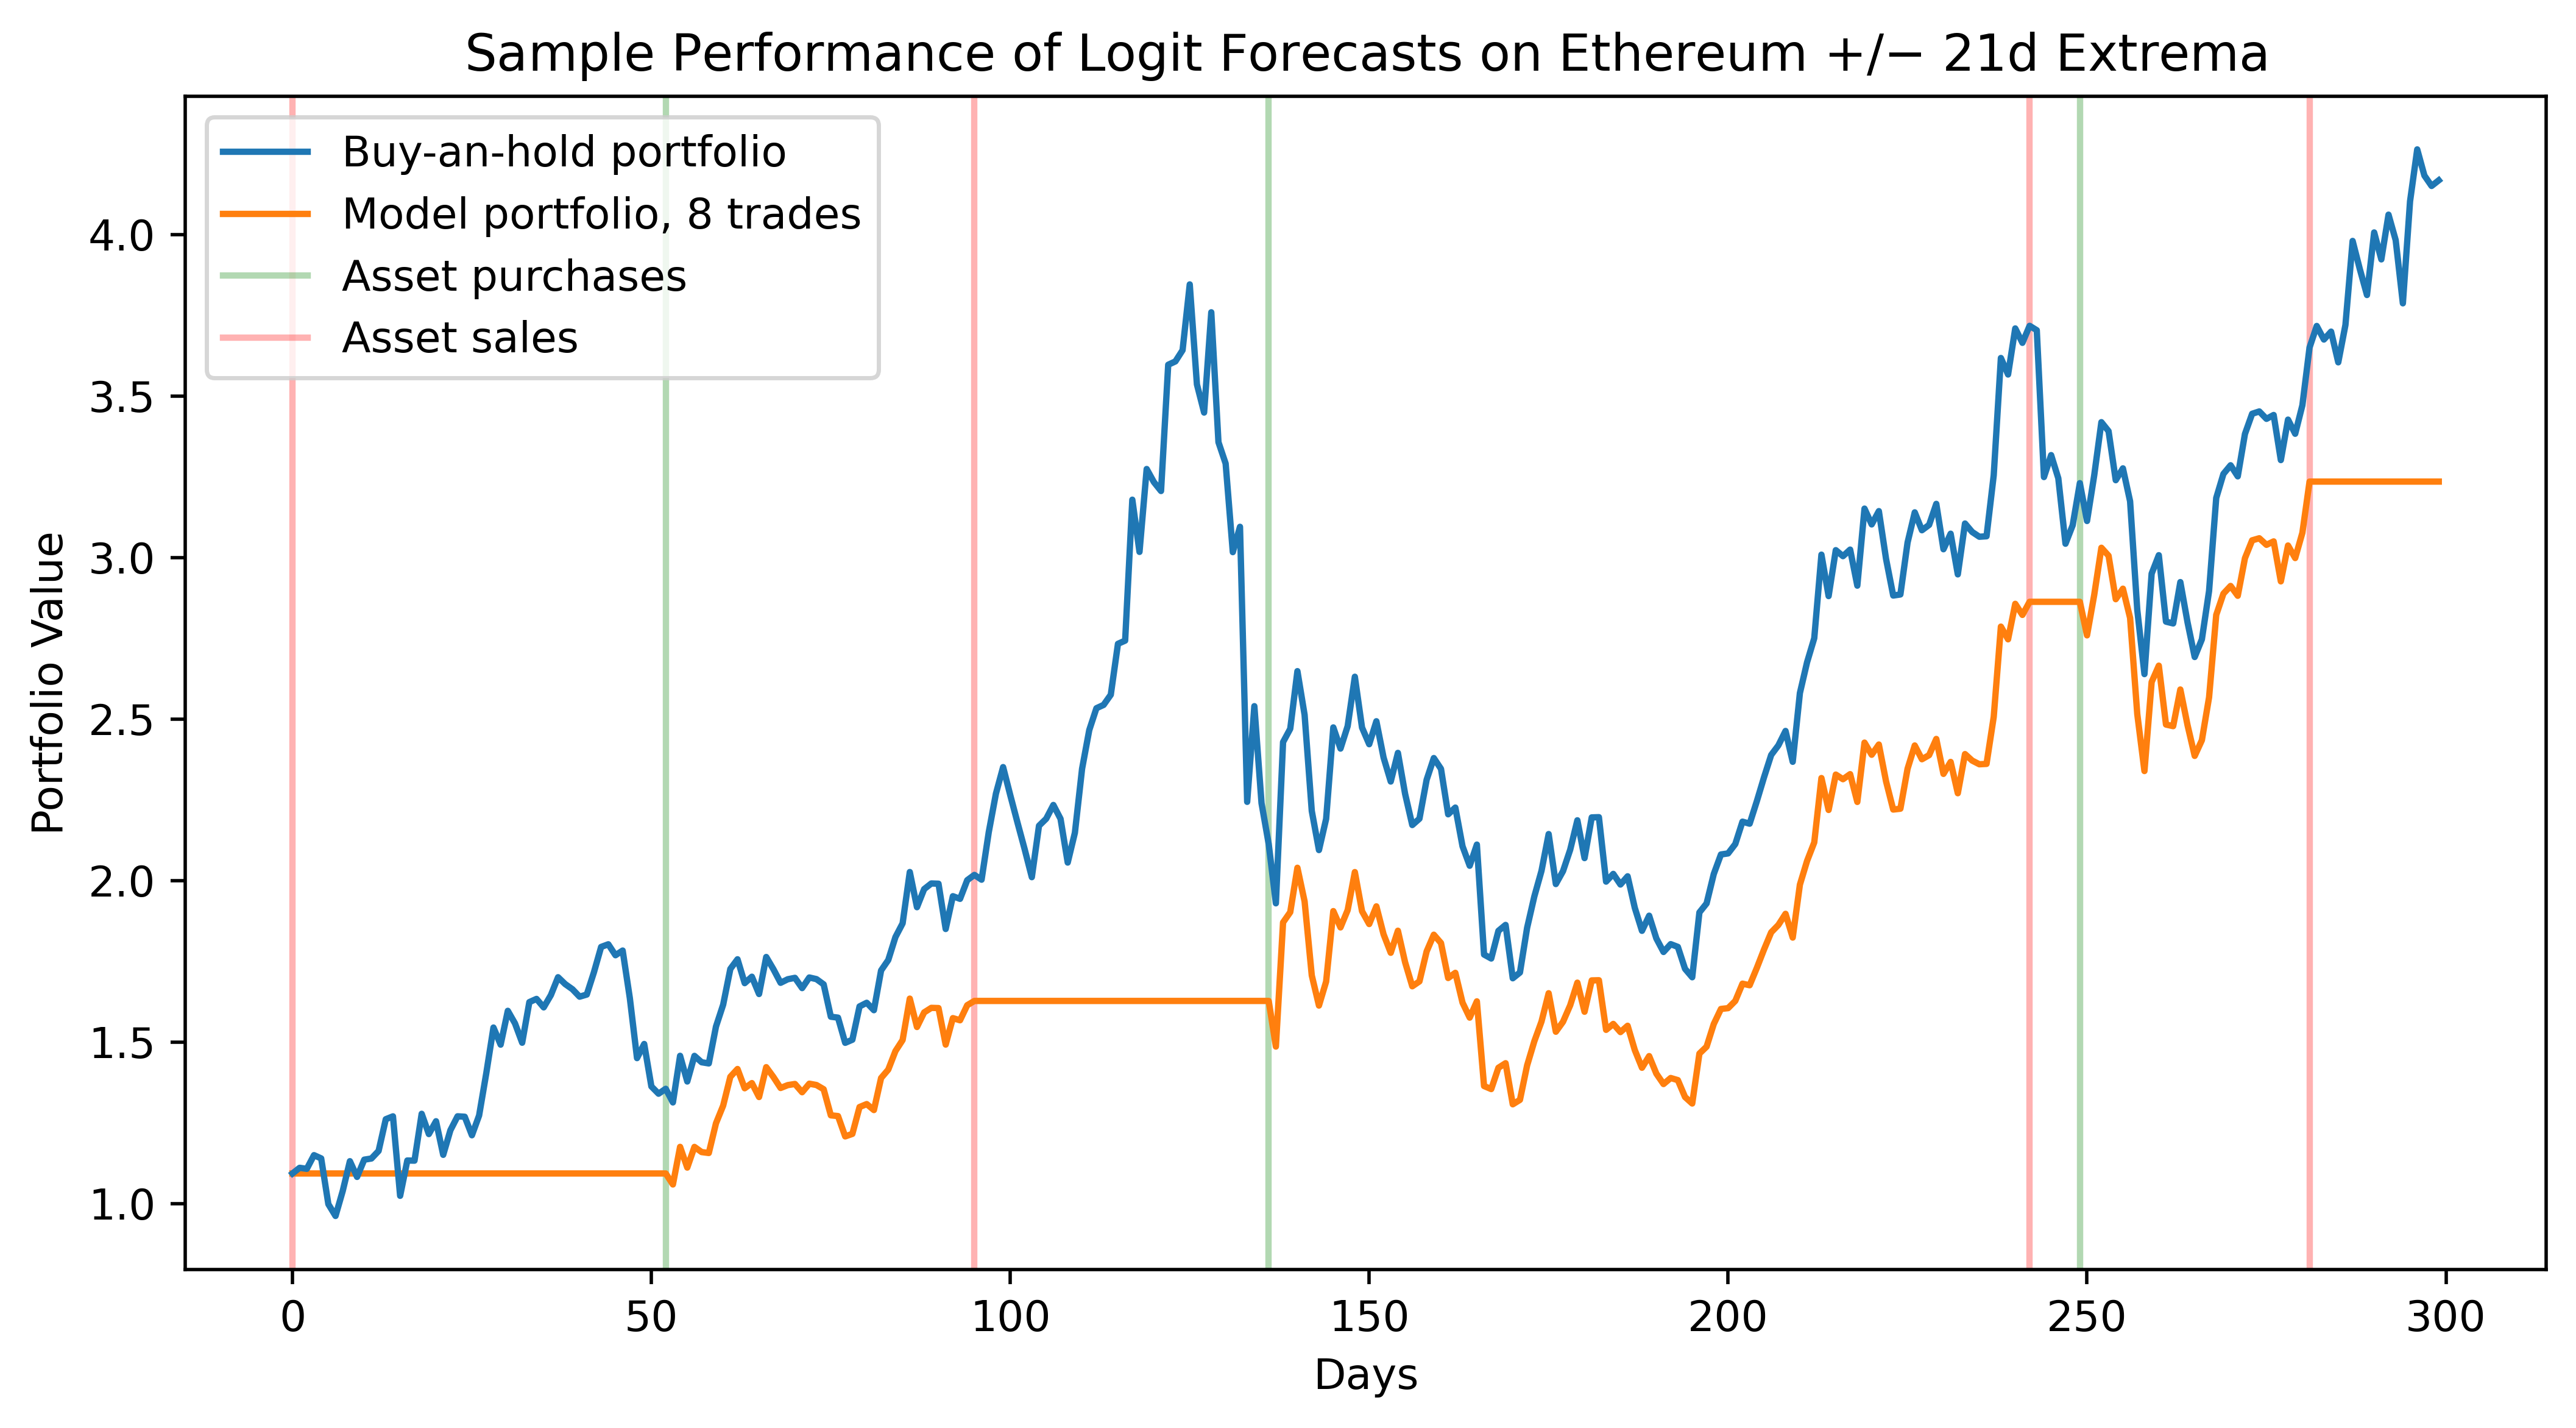

In [38]:
ax = plot_performace(price_data_test, y_pred, 'extrema')
plt.title(f'Sample Performance of Logit Forecasts on Ethereum +/$-$ {timeframe}d Extrema')
plt.show()